In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pickle

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/final_data.csv', header = 0)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import lightgbm as lgb
import xgboost as xgb

In [ ]:
X = data.iloc[:, 1:]
y = data['TARGET']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, stratify = y, random_state = 2021)

In [ ]:
best_model = joblib.load('/content/drive/MyDrive/best_model.pkl')
pred_train_y = best_model.predict(train_x)
pred_test_y = best_model.predict(test_x)

In [ ]:
!pip install shap

     |████████████████████████████████| 356 kB 14.4 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491634 sha256=7c9b5b6a8d9929861b11dd7692a9a5fd0042014f294e5503979615add97a36e8
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(best_model)

In [ ]:
true_y = list(test_y)
pred_y = list(pred_test_y)

TP_index = []
TN_index = []
FN_index = []
FP_index = []

for i ,(true, pred) in enumerate(zip(true_y, pred_y)):
    if (true == 1) and (pred == 1):
      TP_index.append(i)
    elif (true == 1) and (pred == 0):
      FN_index.append(i)
    elif (true == 0) and (pred == 1):
      FP_index.append(i)
    elif (true == 0) and (pred == 0):
      TN_index.append(i)

In [ ]:
print(len(TP_index), len(TN_index), len(FN_index), len(FP_index))

121 2476 72 524


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


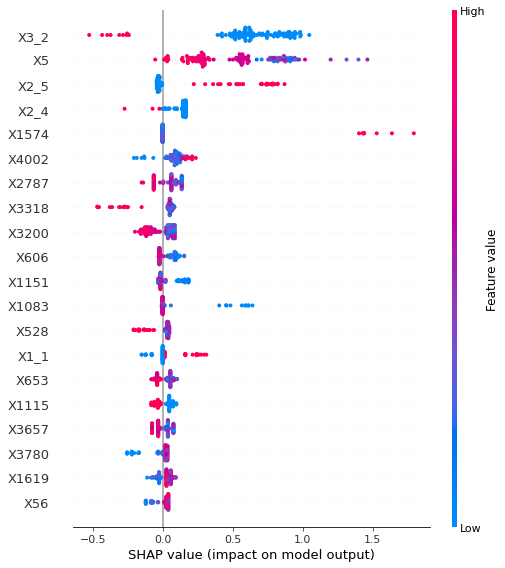

In [ ]:
shap_values_TP = explainer.shap_values(test_x.iloc[1, :])

# Summary plot
plt.figure(figsize=(7,7))
shap.summary_plot(shap_values_TP[1], test_x.iloc[TP_index, :])
plt.show()

#X3_2의 값이 작을수록(0일수록 - 파란색) 모델이 이상을 이상으로 예측하는데 많이 기여하는 경향을 보임, 높을수록 이상을 이상으로 예측하는 확률을 낮춤
#X5의 값이 크거나 작거나 상관없이 모델이 이상을 이상으로 예측하는데 기여하는 경향을 보이나, 값이 클때보다는 작을수록 더 기여함

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


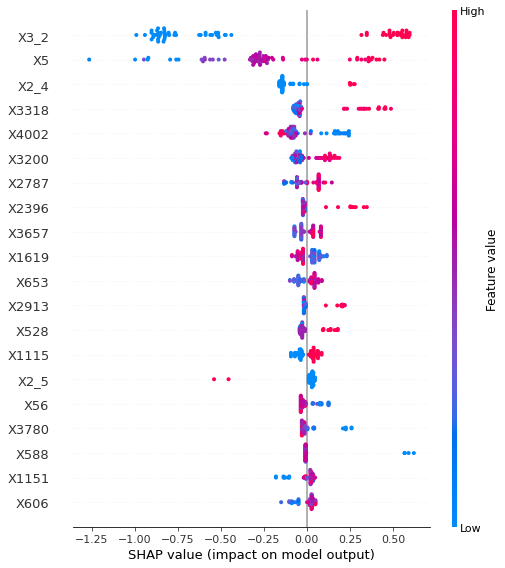

In [ ]:
shap_values_FN = explainer.shap_values(test_x.iloc[FN_index, :])
# Summary plot
plt.figure(figsize=(7,7))
shap.summary_plot(shap_values_FN[0], test_x.iloc[FN_index, :])
plt.show()

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


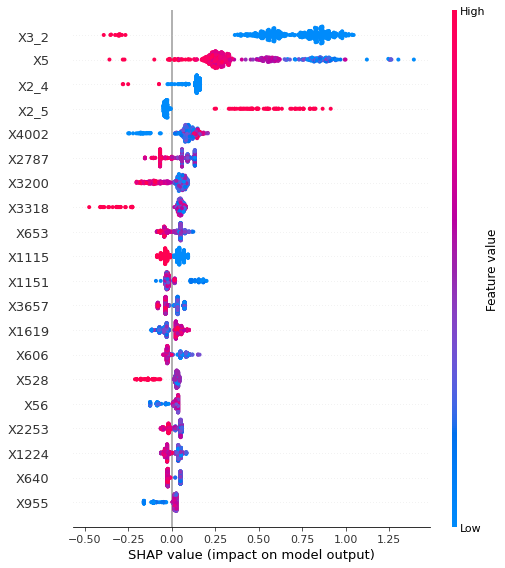

In [ ]:
shap_values_FP = explainer.shap_values(test_x.iloc[FP_index, :])
# Summary plot
plt.figure(figsize=(7,7))
shap.summary_plot(shap_values_FP[1], test_x.iloc[FP_index, :])
plt.show()

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


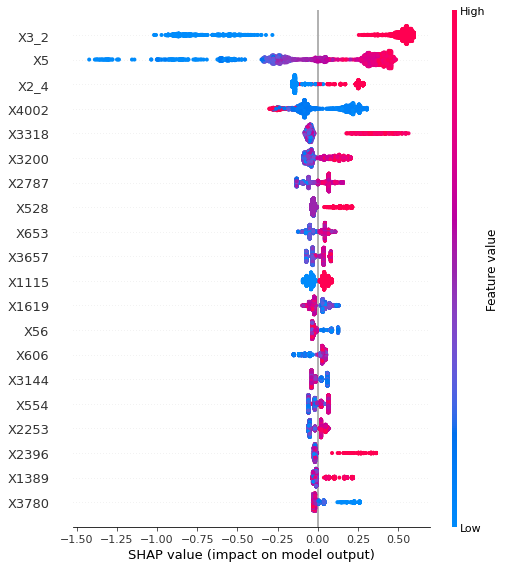

In [ ]:
shap_values_TN = explainer.shap_values(test_x.iloc[TN_index, :])
# Summary plot
plt.figure(figsize=(7,7))
shap.summary_plot(shap_values_TN[0], test_x.iloc[TN_index, :])
plt.show()

In [ ]:
i = TP_index[2]

shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][i,:], test_x.iloc[i,:])

In [ ]:
i = TN_index[2]

shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][i,:], test_x.iloc[i,:])